In [1]:
# Importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
# Insatlling catboost and Regularide Greedy Forest

!pip install catboost rgf_python

     |████████████████████████████████| 66.1MB 56kB/s 
     |████████████████████████████████| 768kB 46.2MB/s 


In [4]:
# importing the train and test data

train_df = pd.read_csv('/content/drive/My Drive/Zindi/Train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Zindi/Test.csv')

In [16]:
train_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [17]:
test_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


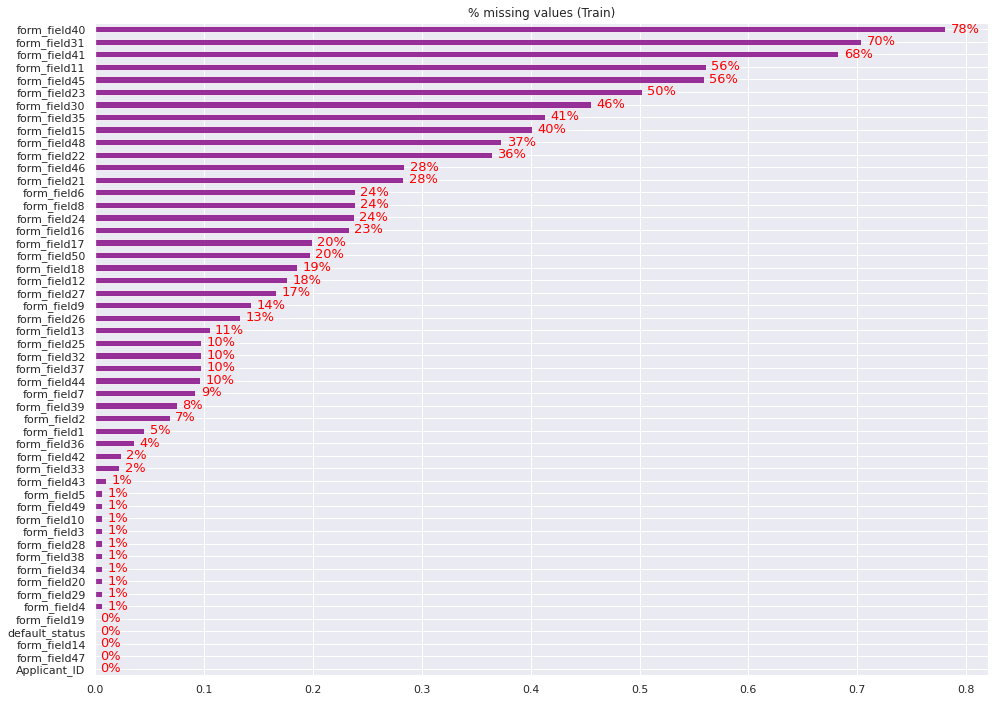

In [20]:
# A plot to check percentage of missing values for each column in the train data

ax_train = train_df.isna().sum().transform(lambda x:x/train_df.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Train)', color='purple', alpha=.8)
for i in ax_train.patches:
    ax_train.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='red', alpha=1)

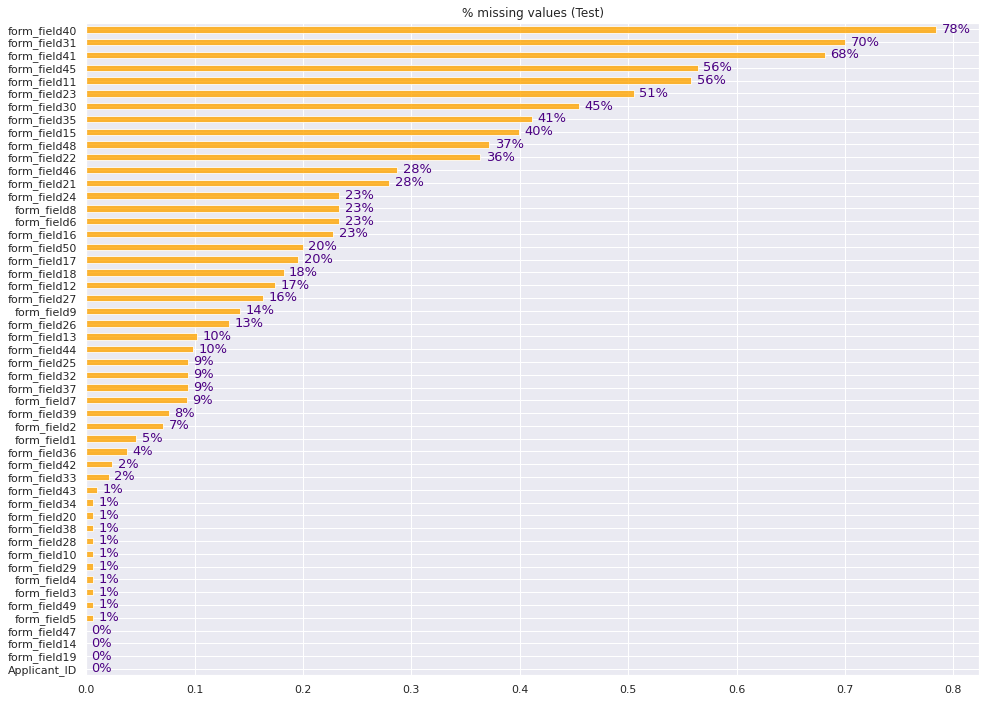

In [21]:
# A plot to check percentage of missing values for each column in the test data
ax_test = test_df.isna().sum().transform(lambda x:x/test_df.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Test)', color='orange', alpha=.8)
for i in ax_test.patches:
    ax_test.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='indigo', alpha=1)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [6]:
# A function to print train and validation score and also return the validation score of a model
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    print("Train AUC : {} \t Val AUC : {}".format(train_auc, test_auc))
    return test_auc

In [26]:
# Importing neccesary libraries for modelling

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

    The only cleaning done on the train and test data was to fill missing values in each column with -999

In [8]:
features = train_df.columns.drop(['Applicant_ID', 'default_status'])
X = pd.get_dummies(train_df[features])
X.fillna(-999, inplace=True)
y = train_df.default_status

test_x = pd.get_dummies(test_df[features])
test_x.fillna(-999, inplace=True)

 After filling missing values, i tried feature engineering, tried creating logical columns from domain understanding, it wasnt bringing improvement on the leaderboard.

My model was a voting classifier comprising of two catboosts, two Regularized greedy forest and two random forest models.
some untuned, others slightly tuned.

Ran each model with a differnet seed value for random state, values are 32, 64 and 45. For each seed, used the voting classifier explained above. Also ran a diffierent variation of the Voting Classifier on seed value containing two catboosts, one regularized greedy forest and two random forest classifier. All in a stratfied kfold of 30 splits.

##            voting classifiers with two catboosts, two Regularized greedy forest and tow random forests

In [9]:
# for seed value 64

 preds, scores = [], []
 
seed = 64
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 
 
i = 30
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
    pipe.fit(x_train, y_train)
    score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(test_x)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
np.mean(scores) #LB Score 0.84532655

Number of splits left 30 to train.
0.850497385042755
Number of splits left 29 to train.
0.8485745767183451
Number of splits left 28 to train.
0.8328444837593307
Number of splits left 27 to train.
0.8395812964601083
Number of splits left 26 to train.
0.824090196626162
Number of splits left 25 to train.
0.8508294923723949
Number of splits left 24 to train.
0.8351956174247714
Number of splits left 23 to train.
0.8368375312320562
Number of splits left 22 to train.
0.8491844747582911
Number of splits left 21 to train.
0.8601936775455095
Number of splits left 20 to train.
0.8415180719152041
Number of splits left 19 to train.
0.8411813088753356
Number of splits left 18 to train.
0.8431910237906792
Number of splits left 17 to train.
0.8466440088768876
Number of splits left 16 to train.
0.8472523550134241
Number of splits left 15 to train.
0.8414698398628901
Number of splits left 14 to train.
0.8412033062564115
Number of splits left 13 to train.
0.8365157239331682
Number of splits left 12 to tr

0.8419910348614154

In [11]:
ss = pd.read_csv("/content/drive/My Drive/Zindi/SampleSubmission.csv")
p = np.mean(preds, axis=0)
ss["default_status"] = p
ss.to_csv("/content/drive/My Drive/Zindi/64.csv", index=False)

  The rest models were ran in different notebooks.

In [ ]:
# For seed value 45

 preds, scores = [], []
 
seed = 45
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 
 
i = 30
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
    pipe.fit(x_train, y_train)
    score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(test_x)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
np.mean(scores)    #LB Score 0.8453015

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/Zindi/SampleSubmission.csv')
ss['default_status'] = np.mean(preds, axis=0)
ss.to_csv('/content/drive/My Drive/Zindi/4ie.csv', index=False)

In [ ]:
# For seed value 32

 preds, scores = [], []
 
seed = 32
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 
 
i = 30
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
    pipe.fit(x_train, y_train)
    score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(test_x)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
np.mean(scores)  #LB Score 0.845320714

In [ ]:
ss = pd.read_csv("/content/drive/My Drive/Zindi/SampleSubmission.csv")
p = np.mean(preds, axis=0)
ss["default_status"] = p
ss.to_csv("/content/drive/My Drive/Zindi/t2rg2cat_2rf.csv", index=False)

##         This was a voting classifier made up of two catboosts, 1 Regularized greedy forest and 2 random forests on seed value of 32

In [ ]:
seed = 32
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed)
scores = []
preds = []
vc = VotingClassifier(estimators=[('cat', CatBoostClassifier(verbose=False, random_state=seed, thread_count=-1)), 
                                  ('cat2', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, learning_rate=0.07085617391173239, 
                                                              random_strength=0.08820672130534879, scale_pos_weight=0.390675124341283, verbose=False, random_state=seed, thread_count=-1)), 
                                  ('rgf', RGFClassifier()), ('rf', RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), 
                                  ('rf2', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], voting='soft', weights=[3, 1, 1.5, 1, 1])
 
i = 1
for train, test in skf.split(X, y):
    pipe = Pipeline([('scaler', MinMaxScaler()), ('model', vc)])
    x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
    pipe.fit(x_train, y_train)
    print('Number of splits trained {} '.format(i))
    score = model_auc(pipe)
    pred = pipe.predict_proba(test_x)[:, 1]
    scores.append(score)
    preds.append(pred)
    i += 1
 
pred_32 = np.mean(preds, axis=0)
np.mean(scores)   #LB Score 0.84533767

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/Zindi/SampleSubmission.csv')
ss['default_status'] = pred_32
ss.to_csv('/content/drive/My Drive/Zindi/32.csv', index=False)

  ##      Blending predictions


In [12]:
sub1 = pd.read_csv('/content/drive/My Drive/Zindi/32.csv')  #LB Score 0.84533767
sub2 = pd.read_csv('/content/drive/My Drive/Zindi/64.csv')  #LB Score 0.84532655
sub3 = pd.read_csv('/content/drive/My Drive/Zindi/4ie.csv')  #LB Score 0.8453015
sub4 = pd.read_csv('/content/drive/My Drive/Zindi/t2rg2cat_2rf.csv')  #LB Score 0.845320714

In [13]:
blend = (sub1['default_status'] + sub2['default_status'] + sub4['default_status'])/3
ss = pd.read_csv('/content/drive/My Drive/Zindi/SampleSubmission.csv')
ss['default_status'] = blend
ss.to_csv('/content/drive/My Drive/Zindi/Final_sub.csv', index=False)

In [14]:
blend1 = sub1['default_status']*0.6 + sub2['default_status']*0.4
ss = pd.read_csv('/content/drive/My Drive/Zindi/SampleSubmission.csv')
ss['default_status'] = blend1
ss.to_csv('/content/drive/My Drive/Zindi/Final_sub1.csv', index=False)

In [15]:
blend2 = sub1['default_status']*0.6 + sub2['default_status']*0.3 + sub4['default_status']*0.1
ss = pd.read_csv('/content/drive/My Drive/Zindi/SampleSubmission.csv')
ss['default_status'] = blend2
ss.to_csv('/content/drive/My Drive/Zindi/Final_sub2.csv', index=False)

  ####                        Further Improvements

      1. Over time i have known a stacking Classifier to work better than a Voting Classifier.  So a stacking Classifier with the right combination of algorithms will beat this Voting Classifiers
      
      2. A very thorough understanding of the dataset so as to create quality features to help the models get closer to understanding the data better.
      
      3. Hypertunning each models individually to near perfection. I did little or no hyper tunning, if it were otherwise the models will perform much more better.
      
      4. Feature selection
      
      5. Handling outliers and Multi colinearity 
 